<a href="https://colab.research.google.com/github/ArielFerreiro/ar-stamp-checker/blob/main/testing/testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is a testing notebook that mimics the functionality to be implemented in the mobile application

In [1]:
%load_ext autoreload
%autoreload 2

#### Load the drive to grab the models and images

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Notebook Imports

In [8]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
from keras.models import load_model

#### Global Params

In [4]:
images_path = 'drive/My Drive/Colab Notebooks/stamps/original/'
results_path = 'drive/My Drive/Colab Notebooks/stamps/results/'
models_path = 'drive/My Drive/Colab Notebooks/stamps/models/'
test_path='drive/My Drive/Colab Notebooks/stamps/test/'

#### Models

In [6]:
bbox_model_name = 'vgg19_bbox_detector.h5'
classif_model_name = 'inception_noaug_softmax_3.h5'

# Bounding Box Detector Model -> Detects the position of the stamp in a full pic
bbox_detector =  load_model(models_path + bbox_model_name)
bbox_detector.load_weights(models_path + 'weights_' + bbox_model_name)

# Classification Model -> Detects if the stamp is fake or genuine
class_detector =  load_model(models_path + classif_model_name)
class_detector.load_weights(models_path + 'weights_' + classif_model_name)

#### Image to test

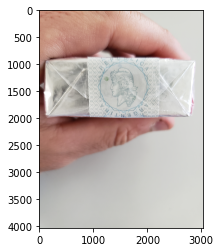

In [ ]:
img = cv2.imread(test_path + 'genuinas_soft/20201016_141356.jpg' )
map = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#map = cv2.resize(map, dsize=(299,299))
plt.imshow(map)

In [ ]:
#save original image data
original_image = map
original_height = map.shape[0]
original_width = map.shape[1]

In [ ]:
# Prepare the image to enter the model
map = cv2.resize(map, dsize=(224,224))
map = map / map.max() #255
map = np.expand_dims(map, axis=0)

In [ ]:
# Predict BBOX
pred_bbox = bbox_detector.predict(map)

In [ ]:
pred_bbox #bbox MAX in model=193

array([[0.31907728, 0.2784075 , 0.5020508 , 0.31868306]], dtype=float32)

In [ ]:
bbox = pred_bbox[0]*193.0
x, y, w, h = bbox

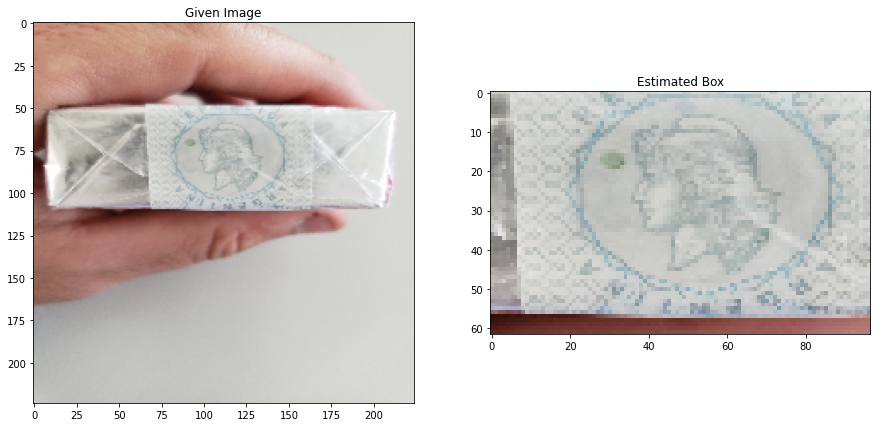

In [ ]:
  crop = map[:, int(y):int(y+h), int(x):int(x+w), :]
  fig, ax = plt.subplots(1, 2, figsize=(15, 15))
  ax[0].imshow(map[0])
  ax[0].set_title("Given Image")
  ax[1].imshow(crop[0])
  ax[1].set_title("Estimated Box")
  plt.show()

In [ ]:
# Adjust box to original image size
new_x = original_width * x / 224
new_y =  original_height * y / 224
new_w = original_width * w / 244
new_h = original_height * h / 224

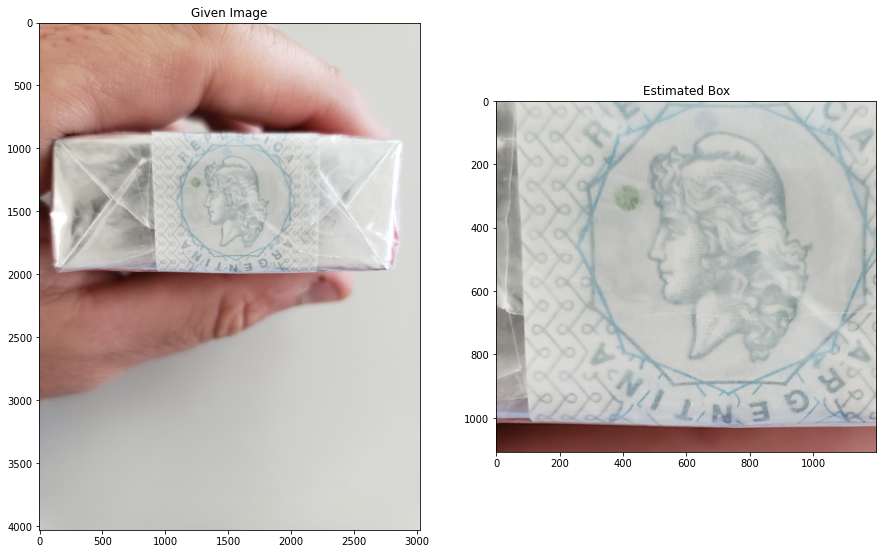

In [ ]:
crop_img = original_image[int(new_y):int(new_y)+int(new_h), int(new_x):int(new_x)+int(new_w)]
fig, ax = plt.subplots(1, 2, figsize=(15, 15))
ax[0].imshow(original_image)
ax[0].set_title("Given Image")
ax[1].imshow(crop_img)
ax[1].set_title("Estimated Box")
plt.show()

In [ ]:
# prepare the original image size crop to the model
crop_img = cv2.resize(crop_img, dsize=(299,299))
crop_img = crop_img / crop_img.max()
crop_img = np.expand_dims(crop_img, axis=0)

In [ ]:
crop_img = np.expand_dims(crop_img, axis=0)

In [ ]:
pred_class = class_detector.predict(crop_img)
pred_class

# 0-1: fake
# 1-0: genuine

array([[0.0358513 , 0.96414876]], dtype=float32)

#### Batch Testing

In [12]:
# Not Stamps
not_stamps_path = test_path + 'not_stamps/'

for file in os.listdir(not_stamps_path):
  i = cv2.imread(not_stamps_path+file)
  i = cv2.resize(i, dsize=(224, 224))
  i = np.expand_dims(i, axis=0)
  i = i/i.max()
  prediccion = bbox_detector.predict(i)
  bbox = prediccion[0]*193.0
  x, y, w, h = bbox
  crop = i[:, int(y):int(y+h), int(x):int(x+w), :]
  print(crop)
# Expected to receive 10 images with no cropping

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [14]:
# Not Stamps
stamps_path = test_path + 'genuinas_soft/'

for file in os.listdir(stamps_path):
  i = cv2.imread(stamps_path+file)
  i = cv2.resize(i, dsize=(224, 224))
  i = np.expand_dims(i, axis=0)
  i = i/i.max()
  prediccion = bbox_detector.predict(i)
  bbox = prediccion[0]*193.0
  x, y, w, h = bbox
  crop = i[:, int(y):int(y+h), int(x):int(x+w), :]
  print(crop)
# Expected to receive crops

[[[[0.85098039 0.85882353 0.8627451 ]
   [0.89019608 0.89803922 0.89803922]
   [0.8745098  0.8745098  0.8745098 ]
   ...
   [0.56862745 0.51764706 0.80784314]
   [0.56078431 0.51372549 0.79607843]
   [0.56078431 0.50588235 0.78823529]]

  [[0.88627451 0.89411765 0.89803922]
   [0.84313725 0.85098039 0.85098039]
   [0.8627451  0.87058824 0.8745098 ]
   ...
   [0.76862745 0.72941176 0.86666667]
   [0.75294118 0.70980392 0.85882353]
   [0.72941176 0.68627451 0.83921569]]

  [[0.87843137 0.88627451 0.89019608]
   [0.86666667 0.8745098  0.87843137]
   [0.84705882 0.8627451  0.86666667]
   ...
   [0.79215686 0.76470588 0.81568627]
   [0.82352941 0.78823529 0.83529412]
   [0.80392157 0.76862745 0.82352941]]

  ...

  [[0.76470588 0.74901961 0.76862745]
   [0.74117647 0.7372549  0.74509804]
   [0.70980392 0.70980392 0.70980392]
   ...
   [0.43529412 0.42745098 0.56862745]
   [0.41960784 0.41176471 0.55294118]
   [0.43137255 0.41568627 0.55294118]]

  [[0.70588235 0.67843137 0.70588235]
   [0.8

In [ ]:
#### DONE v1 02/11/2020
#### Auth: Ariel Ferreiro